In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter

In [35]:
ds_db = pd.read_csv("/home/blair/cognixia/AdvancedPhase/data_analytics_project_2/data_science_salaries.csv")

In [36]:
ds_db[:10]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [197]:

yearSalaryTitle = pd.DataFrame({
    'Work_Year': ds_db['work_year'],
    'Job_Title': ds_db['job_title'],
    'Salary': ds_db['salary']
})

yearSalaryTitle

,Work_Year,Job_Title,Salary
0,2023,Principal Data Scientist,80000
1,2023,ML Engineer,30000
2,2023,ML Engineer,25500
3,2023,Data Scientist,175000
4,2023,Data Scientist,120000
...,...,...,...
3750,2020,Data Scientist,412000
3751,2021,Principal Data Scientist,151000
3752,2020,Data Scientist,105000
3753,2020,Business Data Analyst,100000


In [198]:
year20 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2020])]
year21 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2021])]
year22 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2022])]
year23 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2023])]

workYears20_21_22_23 = pd.concat([year20, year21, year22, year23], axis=0)

workYears20_21_22_23

,Work_Year,Job_Title,Salary
183,2020,Staff Data Analyst,15000
2118,2020,Business Data Analyst,95000
3119,2020,Data Engineer,1000000
3120,2020,Data Engineer,1000000
3138,2020,Data Analyst,20000
...,...,...,...
1815,2023,Machine Learning Engineer,134500
1817,2023,Data Scientist,130000
1818,2023,Data Scientist,90000
1819,2023,Data Engineer,160000


In [380]:
# MAX SALARY PER YEAR

max_20 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2020])].max()
max_21 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2021])].max()
max_22 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2022])].max()
max_23 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2023])].max()
all_max = pd.concat([max_20, max_21, max_22, max_23], axis=1)
all_max

,0,1,2,3
Work_Year,2020,2021,2022,2023
Job_Title,Staff Data Analyst,Staff Data Scientist,Research Scientist,Software Data Engineer
Salary,11000000,30400000,7500000,5000000


0         80000
1         30000
2         25500
3        175000
4        120000
         ...   
3750     412000
3751     151000
3752     105000
3753     100000
3754    7000000
Name: Salary, Length: 3755, dtype: int64

In [389]:
# MAX SALARY PER YEAR

salary_max_20 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2020])]['Salary'].max()
salary_max_21 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2021])]['Salary'].max()
salary_max_22 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2022])]['Salary'].max()
salary_max_23 = yearSalaryTitle[yearSalaryTitle["Work_Year"].isin([2023])]['Salary'].max()
salary_max_per_year = [salary_max_20, salary_max_21, salary_max_22, salary_max_23]
salary_max_per_year

AttributeError: 'list' object has no attribute 'query'

In [174]:
# TOTAL SUM FOR ALL SALARIES PER YEAR
salary20 = pd.DataFrame(year20.groupby("Work_Year")['Salary'].sum())
salary21 = pd.DataFrame(year21.groupby("Work_Year")['Salary'].sum())
salary22 = pd.DataFrame(year22.groupby("Work_Year")['Salary'].sum())
salary23 = pd.DataFrame(year23.groupby("Work_Year")['Salary'].sum())
sal20_21_22_23 = pd.concat([salary20, salary21, salary22, salary23], axis=0)
sal20_21_22_23

,Salary
Work_Year,
2020,29362809
2021,125157548
2022,275260572
2023,286280943


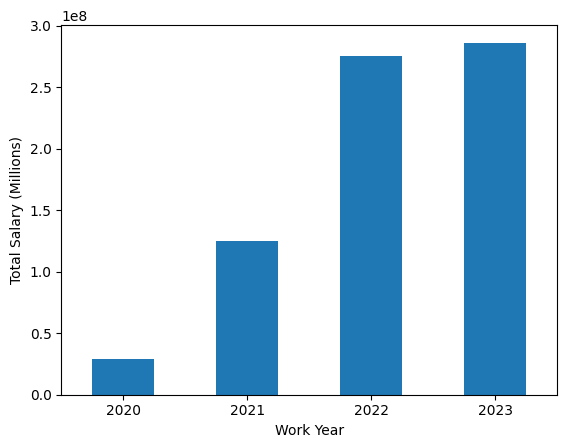

              Salary
Work_Year           
2020        29362809
2021       125157548
2022       275260572
2023       286280943


In [206]:
sal20_21_22_23.plot(kind='bar', legend=False)
plt.xticks(rotation=0)
plt.xlabel('Work Year')
plt.yticks()
plt.ylabel('Total Salary (Millions)')
plt.show()
print(sal20_21_22_23)


2020: 11000000 
2021: 30400000 
2022: 7500000 
2023: 5000000


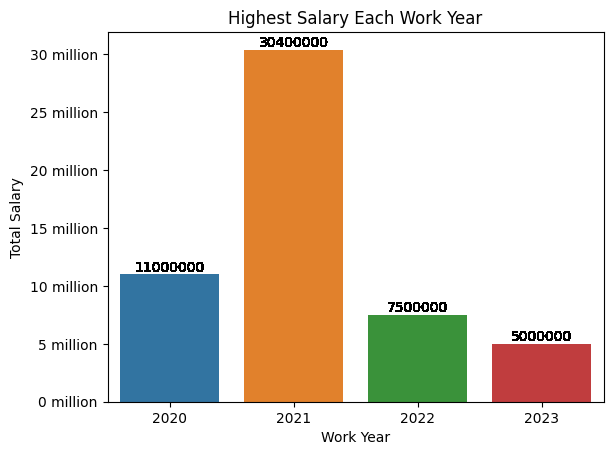

In [444]:
# sns.barplot(x=[2020, 2021, 2022, 2023], y=salary_max_per_year)
salary = sns.barplot(data=yearSalaryTitle , x=[2020, 2021, 2022, 2023], y=salary_max_per_year)
plt.xlabel('Work Year')
plt.ylabel('Total Salary')
plt.title('Highest Salary Each Work Year')

def formatter(x, pos):
    for sal in salary.containers:
        salary.bar_label(sal, fmt='%.0f')
    return str(round(x / 1e6)) + " million"
salary.yaxis.set_major_formatter(formatter)
salary.yaxis.set_minor_formatter(NullFormatter())

print('2020:', salary_max_per_year[0], '\n2021:', salary_max_per_year[1], '\n2022:', salary_max_per_year[2], '\n2023:', salary_max_per_year[3])